In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# EPHEMERIS 

## Computation of a Planet Position From Orbit Parameters


### Abstract

Knowing the orbital parameters of a planet or an asteroid to calculate the position  at certain moment of time. That is the task. It is a base for making different application from a celestial body mechanics simulations, visualizations, to computer games like Kerbal Space, etc. 

This work here uses only 3 Kepler's laws, and no perturbation theory, it is just first approximation of the planet motion. The three Kepler's laws was a big step for making a more accurate prediction for the planet positions for long periods of time. Kepler was able to make quite accurate tables, and he did not have a computer, so the method is computationally effective which makes it attactive for all those already mentioned applications.

### Problem Definition

Knowing the orbital parameters of a planet or an asteroid to calculate the coordinates of the position at any moment of time. The coordinates have to be at the coordinate system related to the Sun, and knowing the orbital parameters of the Earth to calculate observation coordinates at the Earth Sky for that asteroid or planet - to calculate declination and right ascension.

### Applicability

1. Solar related coordinates, could be useful for making simulations of how many different objects move in the Solar system. That could be used to make a nice visualizations, demonstrations, or even could be part of a computer game engine, etc.


2. Declination and right ascension are needed for observation of that object from the Earth. They could be used to point a telescope to that location on the Sky. Getting declination and right ascension is essencial because the result could be checked with all available such software. Precise input data as well as already calculated ephemerides are available from NASA-JPL or Minor Planet Center - thus checking the validity of the created program.


3. It could be used as starting point for more sophisticated project for celestial mechanic, as a first step in that area.


### Testing Data and Validation

Good source of asteroid and comet orbit parameters are "Minor Planet Center" and "NASA JPL" both sites offer ephemeris computations so the result of the program could be checked. The method used in this work is the Kepler's method only no perturbation theory so far, so it is expected for a reasonable periods of time to have a sufficient precision. Minor Planet Center offers unpredictability parameter so the testing data could be selected for those asteroids that have small such unpredictability - they would move in ellipse according to Kepler's laws.


### Visualization

Visualization could be impressing, but it is just another task for software developers, it is outside the scope of this work which is focused on mathematics. Visualization is unrelated with the main objective of this project.


### Entertainment

It could be part of a computer game or presentations for popularization of Astronomy. Solar system is not an empty space it is full with asteroids. Visualizing the entire swarm of them could be rather impressive. Here it is a picture showing how really big is the number of the minor planets - asteroids 

![Asteroids between Jupiter and inner Solar system](InnerSolarSystem-en.png)


## Orbital Elements of a Planet

Looking for an asteroid orbit parametes, reading at wikipedia or using NASA-JPL pages could give us information like that [Orbital Elements of 153002 (2000 JG5)](https://ssd.jpl.nasa.gov/sbdb.cgi?sstr=153002;orb=0;cov=0;log=0;cad=0#orb):

Orbital Elements at Epoch 2459200.5 (2020-Dec-17.0) TDB
Reference: JPL 73 (heliocentric ecliptic J2000)

| Element | Value     | Uncertainty (1-sigma) | Units |
|---------|-----------|-------------|-------|
| e <br> eccentricity |	0.7959518780556988	| 1.0972e-07 |
| a	<br> semi-major axis|	1.340551489041067	| 3.246e-09  | au
| q <br> perihelion distance |	0.2735370137084662   | 1.4737e-07 | au
| i	<br> inclination |	31.43144208629369	| 1.93e-05   | deg
| node <br> longitude of the ascending node| 213.071641162073	| 1.7777e-05 | deg
| peri <br> argument of perihelion | 233.4372674009908	| 1.8239e-05 | deg
| M <br> mean anomaly | 138.5679892519656     | 1.5986e-05 | deg
| tp <br> time of perihelion passage | 2458982.285256400691 <br> (2020-May-12.78525640) | 2.4709e-05 | TDB
| period <br> sidereal orbital period |  566.9224769719815 <br> 1.55 | 2.0591e-06 <br> 5.638e-09 | d <br>yr	
| n <br> mean motion |	0.6350074562624759 |	2.3064e-09 |	deg/d
| Q	<br> aphelion distance| 2.407565964373668	 | 5.8296e-09 |	au


Another useful site is **Minor Planet Center** and here it is orbital parametes for 

[(46610) Besixdouze - Little Prince asteroid](https://www.minorplanetcenter.net/db_search/show_object?utf8=%E2%9C%93&object_id=46610)

| Parameters | Values |
|---------|-----------|
| epoch	       | 2020-12-17.0 |
| epoch JD |	2459200.5 |
| perihelion date |	2021-02-20.42555 |
| perihelion JD	| 2459265.92555 |
| argument of perihelion (°) |	211.76600 |
| ascending node (°) |	172.06224 |
| inclination (°) |	2.40576 |
| eccentricity |	0.1802122 |
| perihelion distance (AU) | 1.8609434 |
| semimajor axis (AU) |	2.2700306 |
| mean anomaly (°) |	341.14599 |
| mean daily motion (°/day) |	0.28817500 |
| aphelion distance (AU) |	2.679 |
| period (years)|	3.42 |

And that hazardous asteroid 
[(153002)](https://www.minorplanetcenter.net/db_search/show_object?utf8=%E2%9C%93&object_id=153002)



| Parameters | Values |
|--------|-----------|
| epoch	| 2019-04-27.0 |
| epoch JD	| 2458600.5 |
| perihelion date	| 2018-10-23.71688 |
| perihelion JD	| 2458415.21688 |
| argument of perihelion (°) | 233.36802 |
| ascending node (°)	| 213.13820 |
| inclination (°)	| 31.45427 |
| eccentricity	| 0.7959196 |
| perihelion distance (AU)	| 0.2736170 |
| semimajor axis (AU)	| 1.3407313 |
| mean anomaly (°)	| 117.63243 |
| mean daily motion (°/day)	| 0.63487940 |
| aphelion distance (AU)	| 2.408 |
| period (years)	| 1.55 |


### Mandatory Parameters

Only 7 parameters are required to specify the orbit and to be able to calculate the planet motion. The rest of parameters can be calculated using only those 7 or different but equivalent set of parameters could also be used. 

The list of required parameters could be seen at the data format of the export file from Minor Planet Center:

#### Mandatory Parameters List -  Minor Planet Center File Data Format: 

    Epoch (in packed form, .0 TT)
   
    Mean anomaly at the epoch, in degrees

    Argument of perihelion, J2000.0 (degrees)
   
    Longitude of the ascending node, J2000.0 (degrees)
   
    Inclination to the ecliptic, J2000.0 (degrees)

    Orbital eccentricity
   
    Mean daily motion (degrees per day)
   
    Semimajor axis (AU)


#### Orbital Period

The parameter orbital period $P$ could be obtained from the semi-major axis, using 3rd Kepler's law thus reducing the orbital parameters to 6, but applying that law requires additional data like the Mass of the Sun or comparison with some well known Planet, its semi-major axis and the orbital period like the Earth: 

$$ 
    \frac{{P_1}^2}{{P_2}^2} = \frac{{a_1}^3}{{a_2}^3}
$$
where $a_1$, $a_2$ are semi-major axis, and $P_1$, $P_2$ are orbital periods.

or knowing the mass of the object or ignoring the mass of the asteroid as negletable to the mass of the SUN for the period we would have:
$$ 
    \frac{a^3}{{P}^2} = \frac{G(M+m)}{4\pi^2} \approx \frac{GM}{4\pi^2}
$$

So we need an additional parameters like the Earth's semi-major axis and orbital period of the mass of the Sun, and those are also parameters, so if we have already the orbital period $P$ then we would use it.

#### Mean Motion and Mean Daily Motion (degrees per day)

Mean motion $n$ is the average angular speed of the planet, and it corresponds to the **period** $P$ of the planet

$n = \frac{2\pi}{P}$ or $n = \frac{360^{\circ}}{P}$  

Mean daily motion is the average angular speed when the time is expressed in days. 

Example from the JPL the provided data for the hazardous asteroid 153002, 

$ P = 566.9224769719815 days $

Mean daily motion is

$ n  = {360^{\circ}}/{566.9224769719815} = 0.6350074562624758^{\circ}$ which is the same value as shown there. Multiplying with 360 would get the period $P$.

**Mean (daily) motion (degrees per day)** is used in next steps at calculations. 

### Ellipse - the Orbit of the Planet

From first Kepler's law we know that the planet revolves around the Sun, in **ellipse** and the Sun is located at one of the foci of that ellipse.

The ellipse is fully defined if we know the **semi-major axis** $a$ and the **eccentricity** $e$, in some places could be given perihelion $q$ and aphelion $Q$ distances, and from them we could calculate **semi-major axis** $a$ and the **eccentricity** $e$.


In [2]:
## asteroid 153002, source: MPC
# eccentricity
e = 0.7959196
# semimajor axis (AU)
a = 1.3407313

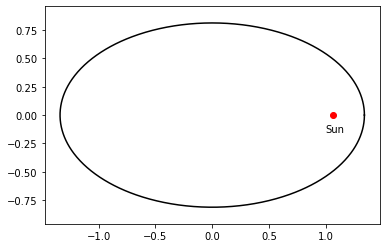

In [3]:
plt.axis("equal")
# minor semiaxis
b = a*math.sqrt(1-e*e)
# eccentric anomaly, 
E = np.linspace(0, 2*math.pi, 1000)
# plot ellipse
x = a*np.cos(E)
y = b*np.sin(E)
plt.plot(x, y, color='k')
# two foci, use one for the sun
xfl = -a*e;
xfr = a*e;
plt.plot([xfr], [0], marker = 'o', color='r')
plt.annotate("Sun", xy=(xfr, 0), xytext=(xfr-0.07, -0.15))
plt.show()

### Polar Coordinates for the Position of the Planet, and True Anomaly

The closest to the Sun point of the ellipse is called **perihelion**, the most distant point from the Sun is called **aphelion** - they are intersection of the ellipse and its major axis. 

To specify position of the planet in the plane of the planet orbit is used **polar coordinate system**. The Sun at the ellipse focus is the pole of the polar coordinates and semi-major axis that passes via the Sun is the initial line $0^{\circ}$ of the polar coordinates. 

The polar angle is measured starting from the perihelion to the planet in a positive direction - counter-clockwise.

Position of the planet in polar coordinates:

r - **Distance** from the pole (the Sun).

$\nu$ - The **polar angle** - the angle between perihelion, the sun and the planet.

#### True Anomaly
The polar angle $\nu$ in the context of planet motion is called **true anomaly**.

The ellipse equation for that polar coordinate system is:

$$
r = \frac{l}{1+e\,cos{\nu}}
$$
where $l = a(1 − e^2)$ is **semi-latus rectum**.

If we know the true anomaly $\nu$, we could calculate the distance $r$ using that formula and obtain polar coordinates, next we could convert them into cartesian ones.

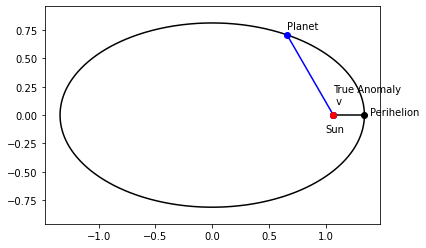

In [4]:
v_deg=120
plt.axis("equal")
plt.plot(x, y, color='k')
x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
v = (math.pi/180)*v_deg
r = a*(1-e*e)/(1+e*math.cos(v))
#note center of drawing CS is not the ellipse's focal polar CS, add a*e
xp = r*math.cos(v)+a*e
yp = r*math.sin(v)
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')
plt.annotate("Sun", xy=(xfr, 0), xytext=(xfr-0.07, -0.15))
plt.annotate("Perihelion", xy=(a, 0), xytext=(a+0.05, 0))
plt.annotate("Planet", xy=(xp, yp), xytext=(xp, yp+0.05))
plt.annotate("True Anomaly\n v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.show()

### Orbital Elements - Meaning and Purpose 

Orbital Elements Meaning
[Orbital_elements](https://en.wikipedia.org/wiki/Orbital_elements)

![Orbital_elements](Orbit1.svg)

#### Orbital Elements Symbols

$a$ Semimajor axis (AU)

$e$ Orbital eccentricity

$n$ Mean daily motion (degrees per day)

$\omega$ Argument of perihelion, J2000.0 (degrees)

$\Omega$ Longitude of the ascending node, J2000.0 (degrees)

$i$ Inclination to the ecliptic, J2000.0 (degrees)

$T$ Epoch (in packed form, .0 TT)

$M_0$ Mean anomaly at the epoch, in degrees

$\nu$ True Anomaly


### Purpose of Elements 

#### Calculating the Planet Motion

    Semimajor axis (AU)
    Orbital eccentricity
    Mean daily motion (degrees per day)

For a given time $t$ that passed since last perihelion of the planet, to calculate true anomaly $\nu$ and the distance from the Sun $r$.

#### Orientation of the Orbit at the Space, at Eccliptic coordinate system with the center the Sun.

    Argument of perihelion, J2000.0 (degrees)
    Longitude of the ascending node, J2000.0 (degrees)
    Inclination to the ecliptic, J2000.0 (degrees)

They would allow us to orient the orbit in 3 dimentional space and receive cartesian coordinates in the coordinate system related to the Sun and Earth eccliptic plane. Next steps could be if we know the coordinates of the Earth, or coordinates of the Sun at the Earth equatorial celestial spheres, to calculate declination and right ascension.

#### Defining where at the Orbit is the planet at the start time moment.

    Epoch (in packed form, .0 TT)
    Mean anomaly at the epoch, in degrees
    
Epoch defines the beginning of time, zero moment, the initial moment at which all parameters are measured, and since that moment we count the time. 

Mean anomaly at the epoch defines where the planet is at its orbit at that time. More precisely how much time passed since the planed had been in perihelion to that moment of time. 

How we can start finding position in several steps, each step arranged as different problems.

### 1. Position in an Elliptic Orbit

In this section, it is used the polar coordinate system that was already introduced, and the initial line of polar coordinates to coincide with the major axis of the ellipse, thus the polar angle would be equal to true anomaly. It is very easy to move to the coordinate system that initial line is coincide with the ascending node $\Omega$, the angle agrument $\theta = \nu + \omega$. But for now we would consider that $\omega = 0$ and $\theta = \nu$, The equation to the ellipse is then:

$$
r = \frac{l}{1+e\,cos{\nu}}
$$

The semi major axis of the ellipse is a , related to the
semi latus rectum by
$$
    l = a ( 1 - e^2 )
$$


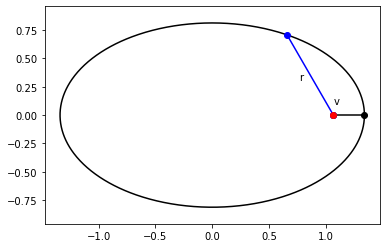

In [5]:
plt.axis("equal")
plt.plot(x, y, color='k')
x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')
plt.annotate("r", xy=(xp, yp), xytext=((xp+xfr)/2-0.1, yp/2-0.05))
plt.annotate("v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.show()

Let us  suppose that a planet is at perihelion at time $t = T$, and the aim of this section will be to find $\nu$ as a function of $t$.

The radius vector from Sun to planet does not move at constant speed (indeed Kepler’s
second law states how it moves), but we can say that, over a complete orbit, it moves at an *average* angular speed of $2\pi/P$, where the $P$ is the orbital period. 

The angle
$$
M = \frac{2\pi}{P}( t - T ) 
$$
is called the **mean anomaly** of the planet at a time t - T after perihelion passage. or mean anomaly could be expressed with mean daily motion
$$
M = n( t - T ) 
$$

The first step to find $\nu$ as a function of $t$ is to calculate the *eccentric anomaly* $E$ from the mean anomaly.

### Auxiliary Circle and Eccentric Anomaly

The circle whose diameter is the major axis of the ellipse is called the **eccentric circle** or, preferably, the **auxiliary circle**. From that definition the center of the auxiliary cirle is the center of the ellipse, and the radius is major semi-axis.

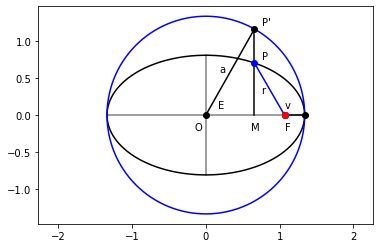

In [6]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
axc_x = a*np.cos(E)
axc_y = a*np.sin(E)
plt.plot(axc_x, axc_y, color='b')

cos_E = (e + math.cos(v))/(1+e*math.cos(v))
sin_E = math.sin(v)*math.sqrt(1-e*e)/(1+e*math.cos(v))
x1, y1 = [0, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black', marker = 'o')
x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black')

x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')

plt.annotate("r", xy=(xp, yp), xytext=((xp+xfr)/2-0.12, yp/2-0.06))
plt.annotate("v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))
plt.annotate("E", xy=(0, 0), xytext=(+0.17, +0.1))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))
plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E+0.1, a*sin_E+0.05))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E+0.1, b*sin_E+0.05))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("a", xy=(0,0), xytext=(a*cos_E/2-0.15, a*sin_E/2))

plt.show()

The angle $E$ is called **eccentric anomaly**.

It is important to find a relation between **eccentric anomaly** $E$ and **true anomaly** $\nu$.

In the cartesian coordinate system, in grey at the figure, the ellipse has the equation:
$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 
$$

The abscissas of the points $P$ and $P'$ is the same and it is $a\,cos{E}$.
The ordinate of $P'$ is $a\,sin{E}$ . By putting $x = a\,cos{E}$ in the equation of the ellipse, we immediately find that the ordinate of $P$ is $b\,sin{E}$.

A consequence of that is for any angle $E$ the point with cartesian coordinates 
$$
x = a\,cos{E}
$$
$$
y = b\,sin{E}
$$
belongs to an ellipse with major semi-axis $a$ and minor semi-axis $b$.

From:
$ MP' = a\,sin{E} $ and $ MP = b\,sin{E} $

The ratio:
$$ \frac{MP}{MP'} = \frac{b\,sin{E}}{a\,sin{E}} = \frac{b}{a}$$

**The ratio ${PM}/{P'M}$ for any line perpendicular to the major axis is $b/a$.**


Let's look at the triangle $FPM$, and from the theorem of Pythagoras

$$
    r^2 = MP^2 + FM^2 = MP^2 + (OM-OF)^2 = (b\,sin{E})^2 + (a\,cos{E}-ae)^2 =  
$$
$$
    = a^2(1-e^2)sin^2{E} + (a\,cos{E}-ae)^2 = a^2sin^2{E}-a^2e^2sin^2{E} + a^2cos^2{E} -2a^2ecos^2{E} + a^2e^2 = 
$$
$$
    = a^2 -2a^2ecos^2{E} + a^2e^2cos^2{E} = a^2(1-e\,cos{E})^2
$$

The **length of the radius vector** $r$
$$
    r = a(1-e\,cos{E})
$$

For $sin{\nu}$ and $cos{\nu}$,  for both cases when $\nu < 90^{\circ}$ and when $\nu > 90^{\circ}$ we get that

$$ sin{\nu} = \frac{MP}{r} = \frac{b\,sin{E}}{r} = \frac{a\sqrt{1-e^2}\,sin{E}}{a(1-e\,cos{E})}$$ 
$$ cos{\nu} = \frac{OM-OF}{r} = \frac{a\,cos{E}-ae}{a(1-e\,cos{E})}$$

So we have the relation between **eccentric and true anomaly**

$$
    sin{\nu} = \frac{\sqrt{1-e^2}\,sin{E}}{1-e\,cos{E}}
$$

$$
    cos{\nu} = \frac{cos{E}-e}{1-e\,cos{E}}
$$

The inverse formulas may also be useful::

$$
    cos{E} = \frac{e+cos{\nu}}{1+e\,cos{\nu}}
$$

$$
    sin{E} = \frac{sin{\nu}\sqrt{1-e^2}}{1+e\,cos{\nu}}
$$

The property "**The ratio ${PM}/{P'M}$ for any line perpendicular to the major axis is $b/a$.**" has an important corollary for areas of slices and sectors of auxiliary circle and the ellipse, the areas are also in ratio $b/a$.

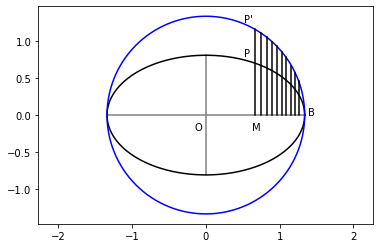

In [7]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
plt.plot(axc_x, axc_y, color='b')

for i in [20,25,30,36,40,44,48,52,56,60]:
    cos_E = math.cos((math.pi/180)*i)
    sin_E = math.sin((math.pi/180)*i)
    x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
    plt.plot(x1, y1, color='black')

plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))

plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E-0.15, a*sin_E+0.1))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E-0.15, b*sin_E+0.1))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("B", xy=(a,0), xytext=(a +0.05, 0))

plt.show()

####  The area of stips perpendicular to major axis to the ellipse and to the auxiliary cirle

Let's compare the areas of the figures $MBP$ and $MBP'$.

If we split at differential thin slices each perpendicular to the major axis, as it is shown at the figure above, and use that ratio $MP/MP' = b/a$, we can see that the area of $MBP$ is $b/a$ times the area of $MBP'$. We have that property for each differentially small rectangular slice with width $h$ - the ratio of the areas $MP\,h/MP'\,h = b/a$, the ratio is valid for the sum, and if the number of slices goes to infinite and width goes to zero then the ratio is preserved for the their limits which are the areas of the figures $MBP$ and $MBP'$.

**The ratio of the area of $MBP$ to the area of $MBP'$ is $b/a$ times.**

Consequently using that property we see that the area of the ellipse is  $b/a$ times the area of the auxiliary cirle; and since the area of the auxiliary circle is $\pi{a}^2$, it follows that the area of the ellipse is $\pi{a}{b}$. 

**The area of the ellipse is $\pi{a}{b}$**

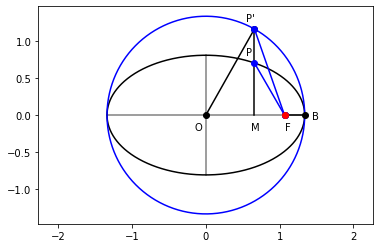

In [8]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
axc_x = a*np.cos(E)
axc_y = a*np.sin(E)
plt.plot(axc_x, axc_y, color='b')

cos_E = (e + math.cos(v))/(1+e*math.cos(v))
sin_E = math.sin(v)*math.sqrt(1-e*e)/(1+e*math.cos(v))
x1, y1 = [0, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black', marker = 'o')
x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black')

x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
x1, y1 = [xfr, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')

plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))
plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E-0.12, a*sin_E+0.10))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E-0.12, b*sin_E+0.10))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("B", xy=(a,0), xytext=(a +0.10, -0.05))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))

plt.show()

**The ratio of the area of $FBP$ to the area of $FBP'$ is $b/a$ times.**

The area of triangle $MFP$: $$S_{MFP} = \frac{1}{2}MF\,MP $$
The area of triangle $MFP'$: $$S_{MFP'} = \frac{1}{2}MF\,MP' $$
So their ratio is
The area of triangle $MFP$: $$\frac{S_{MFP}}{S_{MFP'}} = \frac{MP}{MP'} = \frac{b}{a}$$
The ratio of areas $MBP$ and $MBP'$ is $b/a$.
$$\frac{S_{MBP}}{S_{MBP'}} = \frac{b}{a}$$

The figure $MBP$ is consisted of $FBP$ and $MFP$, and the figure $MBP'$ is consisted of $FBP'$ and $MFP'$, and can write for their areas the equations:

$S_{MBP} = S_{FBP} + S_{MFP}$ and $S_{MBP'} = S_{FBP'} + S_{MFP'}$

The ratio:

$$\frac{S_{FBP}}{S_{FBP'}} = \frac{S_{MBP} - S_{MFP}}{S_{MBP'} - S_{MFP'}}$$

$$S_{MBP} - S_{MFP}=\frac{b}{a}S_{MBP'} - \frac{b}{a}S_{MFP'} = \frac{b}{a}(S_{MBP'} - S_{MFP'})$$

And finally the ratio is:

$$\frac{S_{FBP}}{S_{FBP'}} = \frac{b}{a}$$

That the last one is important for our task to find the eccentic anomaly from knowing mean motion since the last perihelion of the planet. We can resume to that task.

### Eccentic Anomaly from Mean Anomaly


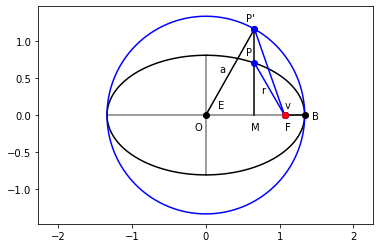

In [9]:
plt.axis("equal")
x1, y1 = [-a, a], [0, 0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, color='grey')
plt.plot(x, y, color='k')
axc_x = a*np.cos(E)
axc_y = a*np.sin(E)
plt.plot(axc_x, axc_y, color='b')

cos_E = (e + math.cos(v))/(1+e*math.cos(v))
sin_E = math.sin(v)*math.sqrt(1-e*e)/(1+e*math.cos(v))
x1, y1 = [0, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black', marker = 'o')
x1, y1 = [a*cos_E, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, color='black')

x1, y1 = [xfr, a], [0, 0]
plt.plot(x1, y1, marker = 'o', color='k')
x1, y1 = [xfr, xp], [0, yp]
plt.plot(x1, y1, marker = 'o', color='b')
x1, y1 = [xfr, a*cos_E], [0, a*sin_E]
plt.plot(x1, y1, marker = 'o', color='b')
plt.plot([xfr], [0], marker = 'o', color='r')

plt.annotate("O", xy=(0, 0), xytext=(-0.15, -0.2))
plt.annotate("P'", xy=(a*cos_E,a*sin_E), xytext=(a*cos_E-0.12, a*sin_E+0.10))
plt.annotate("P", xy=(a*cos_E,b*sin_E), xytext=(a*cos_E-0.12, b*sin_E+0.10))
plt.annotate("B", xy=(a,0), xytext=(a +0.10, -0.05))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))
plt.annotate("r", xy=(xp, yp), xytext=((xp+xfr)/2-0.12, yp/2-0.06))
plt.annotate("v", xy=(xfr, 0), xytext=(xfr+0, +0.10))
plt.annotate("E", xy=(0, 0), xytext=(+0.17, +0.1))
plt.annotate("F", xy=(xfr, 0), xytext=(xfr+0, -0.20))
plt.annotate("M", xy=(a*cos_E,0), xytext=(a*cos_E -0.05, -0.2))
plt.annotate("a", xy=(0,0), xytext=(a*cos_E/2-0.15, a*sin_E/2))

plt.show()

### Eccentic Anomaly from Mean Anomaly

The first step to find $\nu$ as a function of $t$ is to calculate the *eccentric anomaly* $E$ from the mean anomaly.

For a given a moment of time $t$, the angle
$$
    M = \frac{2\pi}{P}( t - T ) = n( t - T ) 
$$
is called the **mean anomaly** of the planet at a time t - T after perihelion passage.

Now it is time to apply **second Kepler's law**.

*A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.*

From that law it follows that the planet is revolving at constant area speed, and that speed is:
$$
    \frac{\pi{ab}}{P}
$$

In time $t - T$ , the area swept out by the radius vector is the area $FBP$, and, because the radius vector sweeps out equal areas in equal times, this area is equal to the fraction $( t - T ) / P$ of the area of the ellipse, where $P$ is the orbital period.

In other words, this area of $FBP$ is:
$$
    S_{FBP} = \frac{(t-T)\pi{ab}}{P}
$$

Now let's use that 
$$
    \frac{S_{FBP}}{S_{FBP'}} = \frac{b}{a}
$$

$$
    S_{FBP'} = \frac{a}{b} S_{FBP} = \frac{a}{b}\frac{(t-T)\pi{ab}}{P} 
$$

The area of $FBP'$ is
$$
    S_{FBP'} = \frac{(t-T)\pi{a^2}}{P} 
$$

The area of the sector $OBP'$ with central angle eccentric anomaly $E$ is
$$
    S_{OBP'} = \frac{1}{2}E{a^2} 
$$

The area of triangle $OFP'$:
$$
    S_{OFP'} = \frac{1}{2}OF\,MP' = \frac{1}{2}{a}{e}{a}sin{E} = \frac{1}{2}{e}{a}^2sin{E}
$$


The sector $OBP'$ is consisted of the triangle $OFP'$ and the figure $FBP'$, and we can express the are of $FBP'$.

$$S_{FBP'} = S_{OBP'} - S_{OFP'}$$,

Now let's put all together
$$
\frac{(t-T)\pi{a^2}}{P} = \frac{1}{2}E{a^2} - \frac{1}{2}{e}{a}^2sin{E}
$$

Dividing by $a$ and multiplying by 2 gives us the following equation

$$
\frac{(t-T)2\pi}{P} = E - {e}\,sin{E}
$$

On the left side is precisely mean motion $M$

$$
M = E - {e}\,sin{E}
$$
that equation is called **Kepler's equation**.

Solution of that last transcedent equation would give eccentric anomaly. From eccentric anomaly the process of finding true anomaly and distance to the planet is straightforward. 

### Kepler's Equation

$$
M = E - {e}\,sin{E}
$$

### Newton-Raphson Process

$$
x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})},
$$

### Solving Kepler's Equation with Newton-Raphson process

The solution of Kepler’s equation is in fact very easy. We write it as 
$$
    f(E) = E - {e}\,sin{E} - M
$$

from which
$$
    f'(E) = 1 - {e}\,cos{E}
$$

and then, by the usual Newton-Raphson process:

$$
E = \frac{M-e(E cos{E}-sin{E})}{1-e\,cos{E}}
$$

// to be continued...

In [10]:
def KeplerEquation(M):
    pass

## TO DO LIST
0. solve kepler's equation
1. program for calculating how a planet moves in its orbit
2. visualize orbits of several planets
3. define speed of the planets, 
4. find 3d coordinates at eccliptic KS with center the Sun. - explain directory cosines
5. transformation matrixes for each of the rotation starting from 2D KS in the orbital plane related with perihelion, next 2D related with argument of perihelion, next to 3D counting inclination angle and finally the KS, 
6. Import coordinates of the SUN or use Earth movement as approximation
7. Find ephemeris of a planet - decl, ra.
8. Check result with Minor Planet Center.
9. Add Support of parabolic and hyperbolic orbits.

If have time start looking at perturbation theory..